# 50.040 Natural Language Processing (Summer 2019) Homework 1

**Write your student ID(s) and name(s)**

ID: 1002323

Name: Woong Wen Tat

Students with whom you have discussed (if any):

### Introduction
Word embeddings are dense vectors that represent words, and capable of capturing semantic and syntactic similarity, relation with other words, etc.
Word2Vec is one of the most popular techniques to learn word embeddings using shallow neural networks. It was developed by Tomas Mikolov in 2013 at Google.
Generally, there are two methods to evaluate the quality of word embeddings. One is intrinsic evaluation, and the other is extrinsic evaluation. In intrinsic evaluation, the similarities between words are explored whereas in extrinsic evaluation, downstream tasks are executed based on word embeddings.

In order to finish the following tasks, you need to [download](http://mattmahoney.net/dc/text8.zip) the text8 dataset and put it under the "data" folder. The text8 dataset consists of one single line of long text. Please do not change the data unless you are requested to do so.

Environment:
- Python 3.5 or above
- gensim package
- pytorch package
- numpy package

## Questions

**(2 points) Consider a given sentence "I am interested in NLP." If the window size is 1 (i.e., consider only the word to the left and to the right of the current word), what will be the context and target pairs in a CBOW model? What will be the pairs in a Skip-gram model?** (Images were taken from Mikolov's [paper](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf))

<table><tr>
<td> <img src="https://cdn-images-1.medium.com/max/800/1*UVe8b6CWYykcxbBOR6uCfg.png"/> </td>
<td> <img src="https://cdn-images-1.medium.com/max/800/1*SR6l59udY05_bUICAjb6-w.png"  style="width: 250px;"/> </td>
</tr></table>

**Write your answer here**

CBOW :  
context, target = am, I  
context, target = (I, interested), am  
context, target = (am, in), interested  
context, target = (interested, NLP), in  
context, target = in, NLP  

Skip-gram:  
context, target = I, am  
context, target = am, (I, interested)  
context, target = interested, (am, in)  
context, target = in, (interested, NLP)  
context, target = NLP, in

## Tasks

### 1. Preprocess the dataset
We will train our own word embedding on text8 dataset, the dataset contains **a single line of text**. Do not remove any characters from the data as it is very clean. We need to load and split the text into a sequence of words, then divide the words into batches to speed up training, each batch contains 100 words, please keep the orders of the words.

In [3]:
#Set the paths of the text dataset
from nltk import word_tokenize
text_path = 'data/text8'

**(2 points) Complete the code of *read_tokenize_text*, which read a text file and tokenize it to words.** For example, a text "I like NLP" can be tokenized as "I", "like", "NLP". You can use either Python build-in function or tools like NLTK package.

In [4]:
#Read the text into memory, tokenize the text into words
def read_tokenize_text(file_path):  
    '''
    Args:
        file_path: the path of a text file, string
    Return:
        A sequence of words, Python list
    '''
    with open(file_path) as file:
        word_tokens = word_tokenize(file.read())
    return word_tokens

**(2 points) Complete the code of *create_word_batch*, to divide a long sequence of words into batches of words.** For example, the word sequence ["I", "like", "NLP", "So", "does", "he"] can be divided into two batches, ["I", "like", "NLP"], ["So", "does", "he"]. It is more efficient to train word embedding on batches of word sequences rather than on a long sequence. 

In [5]:
#Split the words into batches, each batch contains 100 words
def create_word_batch(words, batch_size=100):
    '''
    Args:
        words: a sequence of words, list
        batch_size: the number of words in a batch, integer
    Return:
        batches of words, list
    '''
    word_batch = []
    num_batch = len(words)//batch_size + 1
    for x in range(num_batch):
        word_batch.append(words[x*batch_size:(x+1)*batch_size])
    #to be completed
    return word_batch

Now we can use the functions above to read the text8 data, and create word batches.

In [6]:
words = read_tokenize_text(text_path)
print('Total number of words:', len(words))

Total number of words: 17007698


In [7]:
batch_words = create_word_batch(words)

In [8]:
print(batch_words[0])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing']


### 2. Train our own word embeddings
Instead of implementing a Word2vec model from scratch, we can use Python packages to achieve so by simply specifying inputs, hyperparameters in a package.

In this exercise, we'll call [gensim](https://radimrehurek.com/gensim/models/word2vec.html) package to train word embeddings on *batch_words* sequences created above. If you are not familiar with gensim Word2Vec api, you can run "help(Word2Vec)" command in the cell or refer to the tutorial in the official website.

Set the embedding size as 100, minimum count as 2, and select skip-gram approach. It may take minutes to complete the training. Set the other hyperparameters as default values or you can tune them.

In [9]:
from gensim.models import Word2Vec
from time import time
#help(Word2Vec)

**(2 points) Complete the code using gensim to train word embeddings.**

In [10]:
#Use Word2Vec api to train word embedding
start = time()
#################to be completed################## 
model = Word2Vec(batch_words, size=100, sg=1, min_count=2)
##################################################
end = time()
print('Word embedding trained successfully')
print('Timing:.{:0.2f}s'.format(end-start))

Word embedding trained successfully
Timing:.280.74s


Let's take a look at the embedding for the word "car".

In [11]:
model.wv['car']

array([-0.08973595, -0.20183034, -0.04096122,  0.16662998,  0.4203864 ,
        0.08501867, -0.04689566,  0.06482491, -0.19571684, -0.13501449,
       -0.54454523, -0.5170561 ,  0.70200235,  0.00153575, -0.15563165,
        0.8425932 , -0.22970772,  0.05044886, -0.43319148,  0.22820236,
       -0.17596374, -0.35305238,  0.35426897,  0.45697814,  0.2781437 ,
        0.700919  , -0.39305922,  0.60179526, -0.31382743,  0.07494728,
        0.44773677,  0.02151684, -0.09725516, -0.22153838, -0.21294244,
        0.05431414,  0.16472955, -0.15486881,  0.7554711 , -0.10725041,
        0.33175668, -0.218484  , -0.29640132, -0.313684  ,  0.5966171 ,
       -0.00617229, -0.4334102 ,  0.29610464,  0.43976387,  0.03659817,
       -0.26151597,  0.19847442, -0.01675003, -0.50252664,  0.5180661 ,
        0.38008907,  0.03874338, -0.22448082, -0.38397676, -0.31298083,
        0.2796614 ,  0.8743821 , -0.23675354,  0.0585918 ,  0.16639805,
        0.26748422,  0.01703306,  0.57407665,  0.10986061,  0.52

### 3. Visualize the embeddings

Visualization is often employed in analyzing word embedding. However, word embedding dimension is usually far larger than two, and it is not easy to visualize data that has more than 3 dimensions. We need to transform our word embeddings to 2-dimensional data before doing visualization.

[Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. PCA can be used to reduce dimension by selecting several principal components.

In this exercise, we will use PCA to map the 100-dimensional word embeddings to 2-dimensional points. 

Let's display the size of vocabulary:

In [12]:
len(model.wv.vocab)

135330

then select first 300 words from the vocabulary in the model trained above.

In [13]:
vocab_words = list(model.wv.vocab.keys())
select_300_words = vocab_words[:300]

**(2 points) Complete the code to find the embedding of each word in select_300_words, and stack them into a numpy ndarray**:

In [14]:
import numpy as np
#to be completed
#shape of vectors should be 300*100
vectors = np.vstack([model.wv[word] for word in select_300_words])
print (vectors.shape)

(300, 100)


**(4 points) Complete PCA algorithm using Python numpy package from scratch.** PCA can be regarded as eigenvalue decomposition. Let's denote word embedding vectors as $X \in R^{n \times d}$, $n$ is word number, $d$ is embedding dimension. We will follow procedures described below and implement our PCA algorithm:
- Compute the mean vector $\overline X$ of the embedding vectors X.
- Normalize embedding vectors by subtracting mean vector for each word embedding $X_i$.
$$X_{i}=X_i-\overline X$$
- Compute the covariance matrix of normalized $X$
$$C = \frac {X^TX}{n-1}$$
- Do eigen decomposition of the covariance matrix $C$ using numpy and get eigenvectors $W$(principal components).
- Transform the normalized matrix $X$, and select first kth columns as projection.
$$\hat X = XW$$
$$X_{proj} = \hat X_{1:k}$$


In [24]:
#please use Python built-in function and numpy
def pca(X, k=2):
    '''
    PCA algorithms
    Args:
        X: input matrix
        k: number of principal components
    Return:
        the projections on the first k principal components
    '''
    ###################to be completed################
    n, d = X.shape
    X_bar = np.mean(X, axis=0)
    X = X - X_bar
    cov_mat = np.matmul(X.T, X)/(n-1)
    W, V = np.linalg.eig(cov_mat)
    X_pca = np.matmul(X,V)
    ##################################################
    return X_pca[:, :k]

Now we can project the 100-dimension word vectors to 2-dimension points.

In [25]:
two_d_embeddings = pca(vectors)

Let's check the projection of word embeddings on a 2-D plot.

In [26]:
#Visualize the transformed word embeddings and annotate them with words.
import matplotlib.pyplot as plt

def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')

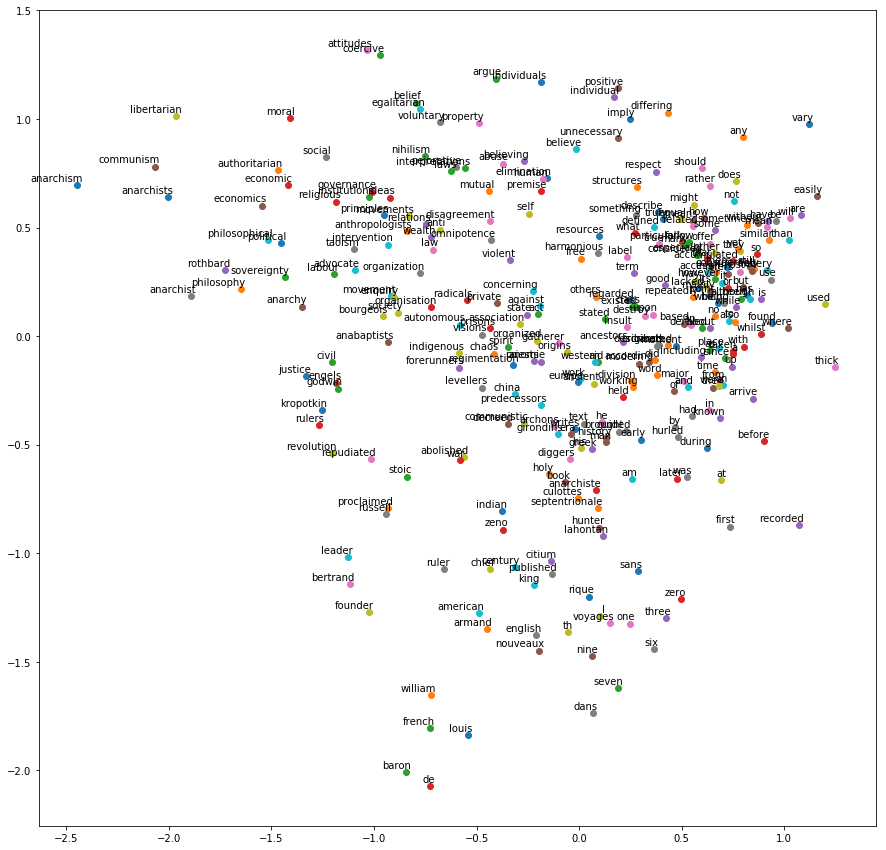

In [27]:
plot(two_d_embeddings, select_300_words)

**(2 points) Describe patterns in the visualization, are there any clusters of similar words? If there aren't any patterns, analyse the problem and re-train the word embeddings.**

**Write your answer here**

There are some patterns that can be observed in the visualization. Conceptual words like "economics", "philosophy" and "political" are close to each other. Similarly, political beliefs such as "anarchism", "philosophy" and "communism". In the middle, you can see a group of numbers such as "nine", "six" and "three". There is also a big cluster of words at the center.

### 4. Intrinsic Evaluation
**(2 points) Based on the embeddings we have trained, find most similar 5 words for each of the words [cat, dog, eat] and their similarities**, check whether the results match our tuition or not. You can use gensim functions.

In [28]:
for word in ['cat', 'dog', 'eat']:
    similar_words = model.wv.most_similar(positive=[word])[:5]
    print ("5 most similar words to " + word + " is " + str(similar_words))
    print ("")

5 most similar words to cat is [('albino', 0.7240276336669922), ('ass', 0.691299319267273), ('bird', 0.6820801496505737), ('cute', 0.6804430484771729), ('shrew', 0.6738669872283936)]

5 most similar words to dog is [('hound', 0.7435353994369507), ('breed', 0.7208601236343384), ('dogs', 0.7188234925270081), ('badger', 0.7188143730163574), ('keeshond', 0.7173516750335693)]

5 most similar words to eat is [('chickens', 0.7892129421234131), ('devour', 0.7807499170303345), ('kidding', 0.7664420008659363), ('eats', 0.7587148547172546), ('ate', 0.7558687925338745)]



A popular choice for intrinsic evaluation of word vectors is to explore the performance in completing word vector analogies, assume there are two word pairs, a:b, c:d, ideally, their embeddings satisfy a rule $x_a-x_b = x_c-x_d$. For instance, queen – king = actress – actor.

**(2 points) Now find out which word will it be in woman - king = man - ?** You can use gensim package.

In [29]:
vector = model.wv['man'] - model.wv['woman'] + model.wv['king']

model.wv.similar_by_vector(vector, topn=5)

[('king', 0.8229625225067139),
 ('conqueror', 0.6178638339042664),
 ('vii', 0.6164774298667908),
 ('kings', 0.608940839767456),
 ('prince', 0.6049408912658691)]

### 5. Extrinsic Evaluation
Apart from intrinsic evaluation, the quality of word embeddings can also be evaluated by downstream tasks such as sentiment analysis, which aims to detect the sentiment polarity of a sentence. For instance, the sentence "I like the movie very much" is positive, whereas "I was very disappointed with my new phone" is negative.

In sentiment analysis, each sentence can be tokenized as a sequence of words, then map each word to its embedding, next feed the sequence of word embedding to a GRU layer and obtain the final output of the GRU as the sentence vector. With the sentence vectors and labels, we can train a classifier.

We will implement a sentiment analysis pipeline step by step on [movie reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data) from the Rotten Tomatoes.

#### 5.1 Load the sentiment  dataset 
The dataset consists of training and testing parts, they have been preprocessed and saved in *.csv format. The data only has two sentiment labels, positive and negative.

In [30]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from dynamic_rnn import dynamicRNN

In [31]:
train_data_split = pd.read_csv('data/train_data_processed.csv')
test_data_split = pd.read_csv('data/test_data_processed.csv')
train_data_split.head()

,PhraseId,SentenceId,Phrase,Sentiment,length
0,44878,2177,of a pregnant premise being wasted by a script...,0,24
1,65677,3329,"All comedy is subversive , but this unrelentin...",0,26
2,102694,5410,"dwells on crossing-over mumbo jumbo , manipula...",0,13
3,4154,156,"the kind of lush , all-enveloping movie experi...",1,8
4,147293,8015,"It 's a fine , focused piece of work that reop...",1,20


#### 5.2 Transform texts into sequences of embedding
We need to tokenize each sentence into a sequence of words first, then map them to a sequence of word embeddings. As the lengths of sentences vary, it is necessary to pad all the sentences to the same length in order to stack them in a tensor.

In [32]:
#initialize unknown word embedding
unk_emb = np.random.rand(100) * 0.01- 0.005
max_text_len = 52

def word2emb(w):
    '''
    Map each word to a vector
    Unknown word will be assigned a random value
    Args:
        w: a word, string
    return:
        embedding of the given word
    '''
    try:
        emb = model.wv[w]
    except:
        emb = unk_emb 
    return emb

**(2 points) Complete the function *text2seq* below, we need a function to tokenize a sentence into a sequence of words.**

In [33]:
def text2seq(text):
    '''
    Split a text into a sequence of words
    Args:
        text: a string of text
    Return:
        a list of words
    '''
    tokens = word_tokenize(text)
    return tokens

**(2 points) Complete the function *seq2emb*, to map a sequence of words to a sequence of word embeddings**, remember to pad each sequence to the same length and return a numpy array.

For example,  the lengths of the two sentences "I like NLP", "It is a nice car" are different, we can paddle the first one as "I like NLP \\$" by adding a special token "$" in the end. In the function seq2emb, you can just set the embeddings of the padded tokens as 0s.

In [34]:
def seq2emb(tokens, max_pad_length=52):
    '''
    Map a sequence of words to a sequence of embedding
    Args:
        tokens: a list of words, lengths may be varied
        max_pad_length: the padding length, integer
    Return:
        a numpy.ndarray object, shape is max_pad_length*embedding_dim
    '''
    vector = [word2emb(word) for word in tokens]
    embedding_dim = vector[0].shape[0]
    zeros = np.zeros((max_pad_length - len(vector), embedding_dim))
    return np.vstack((vector, zeros))

Let's check whether our code works:

In [35]:
tokens = ['An', "awesome", "car"]
example_seq_emb = seq2emb(tokens)
assert example_seq_emb.shape == (52, 100)

We can also create a function *text2emb*, to transform a batch of sentences to padded sequences of embeddings.

In [36]:
def text2emb(texts):
    '''
    Transform texts into sequences of embedding
    Args:
        texts: a list of sentences
    Return:
        sentence representations, sentence lengths
    '''
    text_seqs = list(map(text2seq, texts))
    text_lens = np.array([len(seq) for seq in text_seqs])
    text_seq_embs = list(map(seq2emb, text_seqs))#a list of tokens
    text_seq_embs = np.stack(text_seq_embs, axis=0)
    return text_seq_embs, text_lens

In [37]:
texts = ['This is an awesome car', 'I like NLP']
example_text_seq_embs, example_text_lens = text2emb(texts)

assert example_text_seq_embs.shape == (2, 52, 100)
assert example_text_lens.shape == (2,)

#### 5.3 GRU-based Classifier
Recurrent neural networks(RNN) have been explored in many NLP tasks, and proved to be efficient in capturing context dependencies. [Gated Recurrent Unit](https://en.wikipedia.org/wiki/Gated_recurrent_unit)(GRU)is a variant of Recurrent Neural Network(RNN). The GRU is similar to a long short-term memory (LSTM) with forget gate but has fewer parameters  as it lacks an output gate. The formula and architecture are shown below(taken from Wikipedia):
![gru_formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/d191eafc26594b0d9754f3221ca8a94852588f7c)
![gru](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Gated_Recurrent_Unit%2C_base_type.svg/220px-Gated_Recurrent_Unit%2C_base_type.svg.png)


$x_t$ is the current input, $h_{t-1}$ is the last hidden output of GRU, $h_t$ is current hidden output of GRU. $z_t$ is the forget gate and $r_t$ is the reset gate, $W_z$, $W_r$, $U_z$, $U_r$ are parameters, $b_z$, $b_r$ are biases. 

We have provided a dynamic GRU class to handle varying-length sentences. Note, for this part, we need to use Pytorch package, if you are not familiar with Pytorch, you can refer to [tutorials](https://pytorch.org/tutorials/).

Each sentence can be transformed into a vector using an RNN layer, and we can handle a batch of sentences each time in our dynamic GRU class. Let's check our dynamic GRU class with examples created above. **Note, we need to feed both word embedding tensors of sentences and the actual lengths of sentences to dynamic GRU class.**

In [38]:
embed_dim, hidden_dim = 100, 16
#Create a dynamic RNN object
dynRNN = dynamicRNN(embed_dim, hidden_dim)
#You need to transform numpy arrays to pytorch tensors, for integers, you need to use LongTensor type
example_text_seq_embs = torch.FloatTensor(example_text_seq_embs)
example_text_lens = torch.LongTensor(example_text_lens)
#Obtain the sentence representations
sent_reps = dynRNN(example_text_seq_embs, example_text_lens)
print(sent_reps.size())

torch.Size([2, 16])


In [39]:
print(sent_reps)

tensor([[ 0.4864,  0.3221,  0.2432, -0.0227, -0.2220,  0.3302, -0.1211,  0.0534,
          0.2072, -0.1443, -0.1578, -0.0925,  0.3274,  0.1446,  0.3620, -0.1615],
        [ 0.2515,  0.2297,  0.2722, -0.1073, -0.1853,  0.2698,  0.0025,  0.0172,
          0.0205, -0.0197, -0.1855, -0.4195,  0.1177,  0.1854,  0.3104, -0.0294]],
       grad_fn=<IndexBackward>)


**(4 points) Complete the forward function of RNNClassifier**, which input a tensor representing a batch of sentences as well as a tensor recording the actual lengths of sentences.

In [40]:
class RNNClassifier(nn.Module):
    '''
    Transform sentence representations to sentiment label expression
    '''
    def __init__(self, embed_dim, hidden_dim, output_dim=2):
        '''
        Args:
            embed_dim: embedding dimension, integer
            hidden_dim: GRU hidden layer dimension, integer
            output_dim: output dimension(label size), integer
        '''
        super(RNNClassifier, self).__init__()
        self.dynRNN = dynamicRNN(embed_dim, hidden_dim)
        self.linear = torch.nn.Linear(hidden_dim, output_dim)
        self.dropout = torch.nn.Dropout(0.2)
        self.log_softmax = torch.nn.LogSoftmax(dim=1)
     
    def forward(self, text_seq_embs, text_seq_lens):
        '''
        Args:
            text_seq_embs: batch sequences of word embedding, batch_size*sequence_length*embedding_dim
            text_seq_lens: actual lengths of each batch sequence, batch_size
        '''
        ################to be completed##############
        #1. Obtain the final hidden states for each sentences using dynamicRNN

        #2. Use dropout on the sentence representations

        #3. Feed the sentence vectors to a fully-connected layer

        #4. Get and return the log softmax values of the output

        out = self.dynRNN(text_seq_embs, text_seq_lens)
        out = self.dropout(out)
        out = self.linear(out)
        out = self.log_softmax(out)
        return out


Simply check our classifier:

In [41]:
torch.manual_seed(1)
classifier = RNNClassifier(100, 64)
pred_scores = classifier(example_text_seq_embs, example_text_lens)
assert pred_scores.size() == (2, 2)

With the functions define above, you can transform the sentences in the dataset into sequences of embedding.

In [42]:
#Process the training and testing sentences, obtain the padded sequences of embeddings and actual sentence lengths
train_seq_embs, train_lens = text2emb(train_data_split.Phrase)
test_seq_embs, test_lens = text2emb(test_data_split.Phrase)

In [43]:
train_labels = train_data_split.Sentiment.values
test_labels = test_data_split.Sentiment.values

In order to train the parameters, optimization method and loss should be specified. Let's use Adam optimizer.

In [44]:
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)
loss_func = torch.nn.NLLLoss()

**(2 point) Complete the code of training**. Note, we need to keep records of the average cost for each 40 loops for visualization. You can refer to a pytorch neural network [pipeline](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py). It is sufficient to run this code using CPU only.

In [45]:
epochs = 3
loops = 200
batch_size = 64
costs = []
classifier.train()
for i in range(epochs):
    cost = 0
    for j in range(loops):
        classifier.zero_grad()
        #Select a batch of training data
        batch_index = np.random.choice(len(train_seq_embs), batch_size)
        batch_text_reps, batch_lens = train_seq_embs[batch_index], train_lens[batch_index]
        batch_labels = train_labels[batch_index]
        
        #transform the numpy array to pytorch tensor
        batch_text_reps = torch.FloatTensor(batch_text_reps)
        batch_lens = torch.LongTensor(batch_lens)
        batch_labels = torch.LongTensor(batch_labels)
        
        ########to be completed##########
        #compute the probability of output labels using your classifier
        pred_probs = classifier(batch_text_reps, batch_lens)
        #compute loss
        loss = loss_func(pred_probs, batch_labels)
        
        #backpropagate the gradient and update the weights using loss_func and optimizer
        loss.backward()
        optimizer.step()
        cost += loss.item()
        if j % 40 == 0:
            if j>0:
                costs.append(cost/40)
            cost = 0
            print('Training Loss {:.2f}'.format(loss))

Training Loss 0.71
Training Loss 0.63
Training Loss 0.57
Training Loss 0.53
Training Loss 0.47
Training Loss 0.34
Training Loss 0.56
Training Loss 0.40
Training Loss 0.44
Training Loss 0.45
Training Loss 0.41
Training Loss 0.37
Training Loss 0.41
Training Loss 0.40
Training Loss 0.35


Text(0, 0.5, 'Loss')

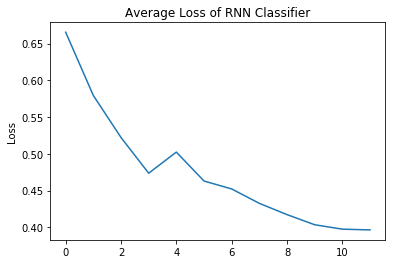

In [46]:
plt.plot(range(len(costs)), costs)
plt.title('Average Loss of RNN Classifier')
plt.ylabel('Loss')

Finally, we can evaluate our classifier on the testing dataset with respect to accuracy. **We can fine tune the hyperparameters like epochs, learning rate, hidden size etc. to improve the performance.** The final accuracy should be above 0.8.

In [47]:
classifier.eval()
test_seq_embs = torch.FloatTensor(test_seq_embs)
test_lens = torch.LongTensor(test_lens)
pred_probs = classifier(test_seq_embs, test_lens)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
pred_labels = pred_probs.argmax(1)
accuracy = accuracy_score(test_labels, pred_labels)
print('Testing Accuracy: {:.2f}'.format(accuracy))

Testing Accuracy: 0.83


In [50]:
confusion_matrix(test_labels, pred_labels)

array([[360,  75],
       [ 90, 475]])

Congratulations! We have implemented a sentiment analysis pipeline successfully!